# Initialization

In [57]:
# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞—è –≤–µ—Ä—Å–∏—è –ø–∞–∫–µ—Ç–æ–≤ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —ç–∫—Å–ø–∏—Ä–µ–º–µ–Ω—Ç–æ–≤
# –ê —Ç–∞–∫ –∂–µ –¥–ª—è —É—Å—Ç–∞–Ω–æ–≤–∫–∏ –≤—Å–µ—Ö –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π

'''Windows'''
!python -m venv venv
!.\venv\Scripts\activate
!pip install -r requirements.txt

'''Linux''';
#!python -m venv venv  
#!source ./venv/bin/activate  
#!pip install -r requirements.txt

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder

In [59]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
Numpy        : 1.22.3


In [60]:
# –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –≤–µ—Ä—Å–∏—é –ø–∞–∫–µ—Ç–æ–≤, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã:
!pip freeze > requirements.txt

In [61]:
# –≤—Å–µ–≥–¥–∞ —Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ RANDOM_SEED, —á—Ç–æ–±—ã –≤–∞—à–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã!
RANDOM_SEED = 42

##  functions

In [62]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

##  Data

In [63]:
from pathlib import Path 

train = pd.read_pickle( Path("data", "all_auto_ru_09_09_2020.pickle_bz2"),
                compression='bz2')
test = pd.read_pickle( Path("data", "test.pickle_bz2"),
                compression='bz2')

# –ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–ï—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç test, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –Ω—É–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –ø—Ä–∏ —ç—Ç–æ–º –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –∫–∞–≥–ª –Ω–∞ –Ω—ë–º –Ω–µ–ª—å–∑—è.

–î–ª—è –Ω–∞—á–∞–ª–∞ —Å—Ç–æ–∏—Ç –ø–æ–Ω—è—Ç—å, –ø–æ –∫–∞–∫–∏–º –¥–∞–Ω–Ω—ã–º –±—É–¥—É—Ç –¥–µ–ª–∞—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

## Test

### –ü—Ä–æ–ø—É—Å–∫–∏

In [64]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))
sns_heatmap = sns.heatmap(
    test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

–ö–∞–∫ –≤–∏–¥–Ω–æ, –æ–Ω–∏ –æ—á–µ–Ω—å –ø–ª–æ—Ç–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤—Å–µ–≥–æ –ø–æ —Ç—Ä—ë–º —Å—Ç–æ–ª–±—Ü–∞–º, —á—Ç–æ –æ—á–µ–Ω—å —Ä–∞–¥—É–µ—Ç. –°—Ä–∞–∑—É –≤–∏–¥–Ω–æ, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü `complectation_dict` —Å—Ç–æ–∏—Ç –≤—ã–∫–∏–Ω—É—Ç—å, –ø–æ—Å–∫–æ–ª—å–∫—É –≤ –Ω–µ–º –±–æ–ª—å—à–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, —á–µ–º –¥–∞–Ω–Ω—ã—Ö. —Ç–∞–∫ –∂–µ —Å—Ä–∞–∑—É —Å—Ç–æ–∏—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

#### complectation_dict

In [65]:
isna= test.complectation_dict.isna()
print('–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏:',len(isna[isna == False])/len(isna))

test.complectation_dict.dropna().iloc[0]

–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏: 0.18503142478233292


'{"id":"20026336","name":"Ambition","available_options":["heated-wash-system","airbag-passenger","lock","door-sill-panel","electro-mirrors","mirrors-heat","cooling-box","computer","seat-transformation","wheel-power","fabric-seats","airbag-side","abs","wheel-leather","climate-control-1","esp","adaptive-light","audiopreparation","ashtray-and-cigarette-lighter","front-centre-armrest","electro-window-back","16-inch-wheels","body-mouldings","condition","airbag-driver","isofix","aux","electro-window-front","light-sensor","hcc","ptf","rain-sensor","tyre-pressure","audiosystem-cd","front-seats-heat","wheel-configuration2","wheel-configuration1","immo","12v-socket","third-rear-headrest"]}'

–í–∏–¥–Ω–æ, —á—Ç–æ —ç—Ç–æ —Å–ª–æ–≤–∞—Ä—å. –î–∞–Ω–Ω—ã—Ö –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ –º–µ–Ω—å—à–µ 20 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤.

–¢—É—Ç —É–∫–∞–∑–∞–Ω id, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–æ —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–∏ —Ç–∞–±–ª–∏—Ü—ã; –∏–º—è, —á–µ–º –±—ã –æ–Ω–æ –Ω–∏ –±—ã–ª–æ; –∏ –ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω–∏–µ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –æ–ø—Ü–∏–π –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –≠—Ç–æ –Ω–µ –Ω–µ—Å—ë—Ç —Ü–µ–Ω–Ω–æ—Å—Ç–∏. –≠—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –±—É–¥–µ—Ç –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω.

#### equipment_dict        

In [66]:
isna= test.equipment_dict.isna()
print('–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏:',len(isna[isna == False])/len(isna))

test.equipment_dict.dropna().iloc[0]

–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏: 0.7118145649541602


'{"engine-proof":true,"tinted-glass":true,"airbag-driver":true,"aux":true,"isofix":true,"electro-window-front":true,"ashtray-and-cigarette-lighter":true,"airbag-passenger":true,"computer":true,"high-beam-assist":true,"seat-transformation":true,"isofix-front":true,"wheel-power":true,"alarm":true,"lock":true,"door-sill-panel":true,"fabric-seats":true,"electro-mirrors":true,"airbag-rear-side":true,"electro-window-back":true,"steel-wheels":true,"ptf":true,"16-inch-wheels":true,"rain-sensor":true,"airbag-side":true,"audiosystem-cd":true,"dark-interior":true,"cooling-box":true,"condition":true,"abs":true,"power-child-locks-rear-doors":true,"front-seats-heat":true,"wheel-configuration2":true,"wheel-configuration1":true,"12v-socket":true,"park-assist-r":true}'

–í–∏–¥–Ω–æ, —á—Ç–æ —ç—Ç–æ —Ç–æ–∂–µ —Å–ª–æ–≤–∞—Ä—å, –Ω–æ –æ–Ω —Å–æ–¥–µ—Ä–∂–∏—Ç  —É–∂–µ –≤–ø–æ–ª–Ω–µ —Å–µ–±–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—É—é –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—é –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –≠—Ç–∏ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ. –û–¥–∞–Ω–∫–æ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∫—Ä–∏—Ç–∏—á–Ω–æ. –î—É–º–∞—é, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ–±–æ–∑–Ω–∞—á–∞—é—â–∏–π –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ. –ú–æ–∂–Ω–æ –±—É–¥–µ—Ç —Å–¥–µ–ª–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–µ –±–∏–Ω–∞—Ä–Ω—ã–º–∏, –∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ç—Ä–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞: –µ—Å—Ç—å, –Ω–µ—Ç, –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é –¥–∞–Ω–Ω—ã–µ

#### –í–ª–∞–¥–µ–Ω–∏–µ

In [67]:
isna= test.–í–ª–∞–¥–µ–Ω–∏–µ.isna()
print('–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏:',len(isna[isna == False])/len(isna))

test.–í–ª–∞–¥–µ–Ω–∏–µ.dropna().iloc[0]

–ó–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã–º–∏: 0.3458167560399008


'3 –≥–æ–¥–∞ –∏ 2 –º–µ—Å—è—Ü–∞'

–°—Ç–æ–ª–±–µ—Ü –∑–∞–ø–æ–ª–Ω–µ–Ω –Ω–∞ 35% 

–í–∏–¥–Ω–æ, —á—Ç–æ —ç—Ç–æ —Å—Ç—Ä–æ–∫–∞, –∫–æ—Ç–æ—Ä–∞—è —É–∫–∞–∑—ã–≤–∞–µ—Ç –≤—Ä–µ–º—è –≤–ª–∞–¥–µ–Ω–∏—è. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ, –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤–ª–∞–¥–µ–ª—å—Ü–∞, –Ω–æ —ç—Ç–æ –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å. 

–î–∞–Ω–Ω—ã—Ö –º–∞–ª–æ–≤–∞—Ç–æ, –Ω–æ –∑–∞—Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —Å–¥–µ–ª–∞—Ç—å –∏–∑ –Ω–∏—Ö –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —É–∫–∞–∑–∞–ª –ª–∏ –≤–æ–¥–∏—Ç–µ–ª—å –≤—Ä–µ–º—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏–ª–∏ –Ω–µ—Ç. –ù–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –ø–æ—Å–ª–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü –Ω–µ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤–æ–≤—Å–µ.

In [68]:
print('TRAIN','Rows =', np.shape(train)[0],'Columns =', np.shape(train)[1], sep=' ')
print('TEST ','Rows =', np.shape(test)[0],'Columns =', np.shape(test)[1], sep=' ') 

TRAIN Rows = 89378 Columns = 26
TEST  Rows = 34686 Columns = 32


–î–∞–∂–µ –ø—Ä–æ—Å—Ç–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–æ —Ä–∞–∑–º–µ—Ä—É –º–∞—Ç—Ä–∏—Ü TRAIN –∏ TEST –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –æ–Ω–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç.

–ê–Ω–∞–ª–∏–∑ —Ç–∏–ø–∞ –∏ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ –ø–æ–∑–≤–æ–ª–∏—Ç —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É (–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –≤ –µ–¥–∏–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ), –∞ —Ç–∞–∫–∂–µ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å, –µ—Å—Ç—å –ª–∏ –æ–±—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ –Ω–µ—Å–æ–≤–ø–∞–¥–∞—é—â–∏—Ö (–ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ, –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é) —Å—Ç–æ–ª–±—Ü–∞—Ö TRAIN –∏ TEST.

In [69]:
#–£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫
train_mod = train.drop_duplicates()
test_mod = test.drop_duplicates()

print('TRAIN','Rows =', np.shape(train_mod)[0],'Columns =', np.shape(train_mod)[1], sep=' ')
print('TEST ','Rows =', np.shape(test_mod)[0],'Columns =', np.shape(test_mod)[1], sep=' ') 

TRAIN Rows = 87264 Columns = 26
TEST  Rows = 34686 Columns = 32


In [70]:
#–†–∞–∑–±–∏—Ä–∞–µ–º—Å—è —Å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–æ–º –∏ –ø–æ—Ç–µ—Ä–µ–π –ø–æ–ª–æ–≤–∏–Ω—ã —Å—Ç—Ä–æ–∫ –≤ —Ç—Ä–µ–π–Ω–µ
%store train_mod 
%store test_mod

Stored 'train_mod' (DataFrame)
Stored 'test_mod' (DataFrame)


[Preprocessing_and_thoughts](./secondary_notebooks/Preprocessing_and_thoughts.ipynb)

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –º–∞—Ç—Ä–∏—Ü –¥–æ –∏ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ TRAIN –±—ã–ª–∏ –¥—É–±–ª–∏—Ä—É—é—â–∏–µ—Å—è —Å—Ç—Ä–æ–∫–∏, —Ç–µ–ø–µ—Ä—å –∏—Ö –Ω–µ—Ç.

##### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–∏—Ö –∏ —Ä–∞–∑–ª–∏—á–∞—é—â–∏—Ö—Å—è —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ TRAIN –∏ TEST

In [13]:
#–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã
common_columns = set(test.columns).intersection(train.columns)

#–¢–æ–ª—å–∫–æ –≤ TEST
test_only_columns = set(test.columns).difference(train.columns)

#–¢–æ–ª—å–∫–æ –≤ TRAIN
train_only_columns = set(train.columns).difference(test.columns)

#### –í–æ–ø—Ä–æ—Å—ã –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:
1. –°–æ–≤–ø–∞–¥–∞—é—Ç –ª–∏ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ –æ–±—â–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö?
2. –ï—Å—Ç—å –ª–∏ —Å—Ö–æ–¥–Ω—ã–µ –ø–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—é –¥–∞–Ω–Ω—ã–µ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö —Å —Ä–∞–∑–Ω—ã–º –Ω–∞–∑–≤–∞–Ω–∏–µ–º?
3. –ï—Å—Ç—å –ª–∏ —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å?

##### –û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã TRAIN –∏ TEST - —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [14]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
index_list = test[common_columns].dtypes.index.to_list()
test_list = test[common_columns].dtypes.values.tolist()
train_list = train[common_columns].dtypes.values.tolist()

dict_comparison = {
    'title': index_list,
    'test_type': test_list,
    'train_type': train_list
}

comparison = pd.DataFrame(dict_comparison)
comparison.sort_values('title')

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  index_list = test[common_columns].dtypes.index.to_list()
C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_list = test[common_columns].dtypes.values.tolist()
C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_list = train[common_columns].dtypes.values.tolist()


title test_type train_type
8               bodyType    object     object
5                  brand    object     object
10                 color    object     object
16           description    object     object
6     engineDisplacement    object     object
18           enginePower    object    float64
17              fuelType    object     object
13               mileage     int64      int64
9              modelDate     int64    float64
11                  name    object     object
1          numberOfDoors     int64    float64
14        productionDate     int64      int64
12  vehicleConfiguration    object     object
0    vehicleTransmission    object     object
7              –í–ª–∞–¥–µ–ª—å—Ü—ã    object    float64
15              –í–ª–∞–¥–µ–Ω–∏–µ    object     object
4                    –ü–¢–°    object     object
3                 –ü—Ä–∏–≤–æ–¥    object     object
20                  –†—É–ª—å    object     object
2              –°–æ—Å—Ç–æ—è–Ω–∏–µ    object    float64
19               –¢–∞–º–æ–∂–Ω—è    object       bool

–ö–∞–∫ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —Ñ–æ—Ä–º–∞—Ç –¥–∞–Ω–Ω—ã—Ö –≤ —á–∞—Å—Ç–∏ —Å—Ç–æ–ª–±—Ü–æ–≤ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç. –¢–∞–∫–∂–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Å–æ–¥–µ—Ä–∂–∞–∏–º–æ–µ —è—á–µ–µ–∫.

##### –ë—Ä–µ–Ω–¥—ã –≤ TRAIN –∏ TEST

In [15]:
display(train_mod.brand.unique())
print('–í—Å–µ–≥–æ –≤ TRAIN',len(train.brand.unique()),'–±—Ä–µ–Ω–¥–æ–≤.',sep=' ')

array(['AUDI', 'BMW', 'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'DAEWOO', 'DODGE', 'FORD', 'GEELY', 'HONDA', 'HYUNDAI',
       'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LEXUS', 'MAZDA', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'SKODA', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'GREAT_WALL', 'LAND_ROVER', 'MERCEDES', 'SSANG_YONG'], dtype=object)

–í—Å–µ–≥–æ –≤ TRAIN 36 –±—Ä–µ–Ω–¥–æ–≤.


In [16]:
display(test_mod.brand.unique())
print('–í—Å–µ–≥–æ –≤ TEST',len(test_mod.brand.unique()),'–±—Ä–µ–Ω–¥–æ–≤.',sep=' ')

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI'],
      dtype=object)

–í—Å–µ–≥–æ –≤ TEST 12 –±—Ä–µ–Ω–¥–æ–≤.


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ TRAIN –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –≤ 3 —Ä–∞–∑–∞ –±–æ–ª—å—à–µ –±—Ä–µ–Ω–¥–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∏—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –æ–±–æ–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö.

Text(0.5, 1.0, 'TEST brands')

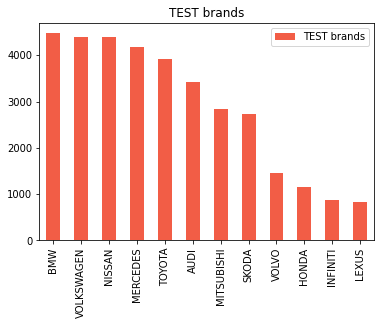

In [17]:
#–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤ –≤ TEST
test_mod['brand'].value_counts().plot(kind='bar', color = '#F25D46', label='TEST brands')
plt.legend()
plt.title('TEST brands')

Text(0.5, 1.0, 'TRAIN brands')

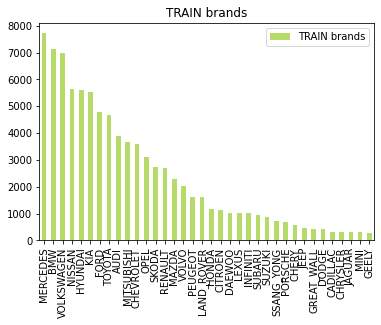

In [18]:
#–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤ –≤ TRAIN
train_mod['brand'].value_counts().plot(kind='bar', color = '#B6DB69', label='TRAIN brands')
plt.legend()
plt.title('TRAIN brands')

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ä–∞—Å–ø–µ—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö —Ç–æ–ª—å–∫–æ –≤–æ TEST, —Å—Ö–æ–∂–µ —Å TRAIN. 

–ü–æ—ç—Ç–æ–º—É –¥–ª—è –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ ML –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å, –æ–¥–Ω–∞–∫–æ –¥–ª—è Staking –∏ –∞–Ω—Å–∞–º–±–ª–µ–π –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∏ —É–¥–∞–ª–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –≤ –∫–ª–∞—Å—Å—ã –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

Text(0.5, 1.0, 'MOD_TRAIN brands')

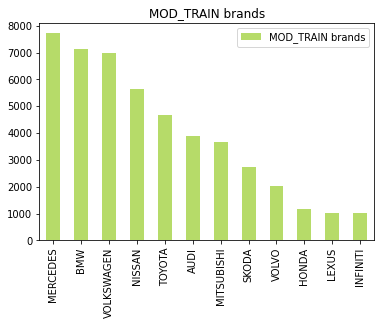

In [19]:
#–£–¥–∞–ª–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ TEST –±—Ä–µ–Ω–¥–æ–≤
#–°–ø–∏—Å–æ–∫ –±—Ä–µ–Ω–¥–æ–≤ –∏–∑ TEST
brand_list = test_mod.brand.unique().tolist()
train_mod = train_mod.loc[train.brand.isin(brand_list)]

#–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—Ä–µ–Ω–¥–æ–≤ –≤ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–º TRAIN
train_mod['brand'].value_counts().plot(kind='bar', color = '#B6DB69', label='MOD_TRAIN brands')
plt.legend()
plt.title('MOD_TRAIN brands')

##### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —è—á–µ–µ–∫ TRAIN –∏ TEST, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [20]:
#–î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
index_list = test[common_columns].dtypes.index.to_list()
test_list = test[common_columns].dtypes.values.tolist()
train_list = train[common_columns].dtypes.values.tolist()

dict_comparison = {
    'title': index_list,
    'test_type': test_list,
    'train_type': train_list
}

comparison = pd.DataFrame(dict_comparison)
comparison.sort_values('title')

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  index_list = test[common_columns].dtypes.index.to_list()
C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_list = test[common_columns].dtypes.values.tolist()
C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3298209608.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_list = train[common_columns].dtypes.values.tolist()


title test_type train_type
8               bodyType    object     object
5                  brand    object     object
10                 color    object     object
16           description    object     object
6     engineDisplacement    object     object
18           enginePower    object    float64
17              fuelType    object     object
13               mileage     int64      int64
9              modelDate     int64    float64
11                  name    object     object
1          numberOfDoors     int64    float64
14        productionDate     int64      int64
12  vehicleConfiguration    object     object
0    vehicleTransmission    object     object
7              –í–ª–∞–¥–µ–ª—å—Ü—ã    object    float64
15              –í–ª–∞–¥–µ–Ω–∏–µ    object     object
4                    –ü–¢–°    object     object
3                 –ü—Ä–∏–≤–æ–¥    object     object
20                  –†—É–ª—å    object     object
2              –°–æ—Å—Ç–æ—è–Ω–∏–µ    object    float64
19               –¢–∞–º–æ–∂–Ω—è    object       bool

In [21]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
def type_comparison(column):
    print('TEST')
    display(test_mod[column].sample(5))
    print('TRAIN')
    display(train_mod[column].sample(5))  

In [22]:
#bodyType
column = 'bodyType'
type_comparison(column)

TEST


28117              —Å–µ–¥–∞–Ω
29892              —Å–µ–¥–∞–Ω
13157              —Å–µ–¥–∞–Ω
17941              —Å–µ–¥–∞–Ω
1046     —É–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.
Name: bodyType, dtype: object

TRAIN


67059    –ü–∏–∫–∞–ø –û–¥–∏–Ω–∞—Ä–Ω–∞—è –∫–∞–±–∏–Ω–∞ 79
45966                   –ö–æ–º–ø–∞–∫—Ç–≤—ç–Ω
45723            –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.
3368             –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.
8883             –í–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.
Name: bodyType, dtype: object

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É –∏ —É–±—Ä–∞—Ç—å –∏–∑ –∑–Ω–∞—á–µ–Ω–∏—ë –∫–æ–ª-–≤–æ –¥–≤–µ—Ä


In [23]:
#color
column = 'color'
type_comparison(column)

TEST


12190         —á—ë—Ä–Ω—ã–π
10703     –∫–æ—Ä–∏—á–Ω–µ–≤—ã–π
29804    —Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π
29449         —á—ë—Ä–Ω—ã–π
17699         —á—ë—Ä–Ω—ã–π
Name: color, dtype: object

TRAIN


60751    EE1D19
82303    FAFBFB
49926    040001
31927    C49648
30947    040001
Name: color, dtype: object

In [24]:
#description
column = 'description'
type_comparison(column)

TEST


12452    –î–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫. –ü—Ä–æ–¥–∞—é —Å–≤–æ–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å....
29602    –†–µ–¥–∫–∏–π —ç–∫–∑–µ–º–ø–ª—è—Ä BMW e39 Turing —Å –º–æ—Ç–æ—Ä–æ–º 4.4 ...
33463    –ü—Ä–æ–¥–∞—é –∞–≤—Ç–æ–º–æ–±–∏–ª—å –∂–µ–Ω—ã, –∞–≤—Ç–æ –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è...
20051    –ú–∞—à–∏–Ω–∞ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞–ª–∞—Å—å –≤ –¥–µ–∫–∞–±—Ä–µ 18 –≥–æ–¥–∞.\n–ö–æ–º–ø–ª...
22883    –í –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏, –≤–ª–æ–∂–µ–Ω–∏–π –Ω–µ —Ç—Ä–µ–±—É–µ—Ç. –í...
Name: description, dtype: object

TRAIN


2689                            –ê–≤—Ç–æ –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ 
51214    –ê–≤—Ç–æ –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏, –Ω–µ —Ç—Ä–µ–±—É–µ—Ç –≤–ª–æ–∂–µ–Ω–∏–π...
78230    ¬´Inchcape Certified-  –ü–µ—Ä–≤—ã–π –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–π –æ—Ñ–∏...
75923    –ü–Ω–µ–≤–º–æ–ø–æ–¥–≤–µ—Å–∫–∞, –≤–∏–±–∞—Å—Ç–∞, –∑–∏–º–Ω—è—è —Ä–µ–∑–∏–Ω–∞,–∑–∞—â–∏—Ç–∞ ...
50131    –ú–ê–®–ò–ù–ê –í –ò–í–ê–ù–¢–ï–ï–í–ö–ï!!!\n–í—ã–∫—É–ø—ã, –∫–∞—Ä–ø—Ä–∞–π—Å—ã –∏ –ø—Ä...
Name: description, dtype: object

In [25]:
#engineDisplacement
column = 'engineDisplacement'
type_comparison(column)

TEST


18756    1.6 LTR
28822    3.2 LTR
23474    1.4 LTR
27179    2.0 LTR
18350    3.5 LTR
Name: engineDisplacement, dtype: object

TRAIN


65947     2.0
7062     525i
66824    4.5d
50377     2.4
75315     2.0
Name: engineDisplacement, dtype: object

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [26]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
def GetEngineDisplacement(x):
    row = str(x)
    engine = re.findall('\d\.\d', row)
    if engine == []:
        return None
    return float(engine[0])

train_mod['engineDisplacement'] = train_mod['engineDisplacement'].map(GetEngineDisplacement)
test_mod['engineDisplacement'] = test_mod['engineDisplacement'].map(GetEngineDisplacement)

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\1747633296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod['engineDisplacement'] = train_mod['engineDisplacement'].map(GetEngineDisplacement)


In [27]:
#engineDisplacement
column = 'engineDisplacement'
type_comparison(column)

TEST


3242     2.0
32449    1.8
24974    1.8
12579    1.6
13900    2.0
Name: engineDisplacement, dtype: float64

TRAIN


75919    3.0
8563     NaN
39242    NaN
2314     3.1
61635    1.6
Name: engineDisplacement, dtype: float64

–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –ø–æ—è–≤–∏–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏

In [28]:
test_mod[test_mod['engineDisplacement'].isna()]

bodyType       brand  \
5241   –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫ 5 –¥–≤.        AUDI   
7992       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8252       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8350       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8684       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8722       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
8917       —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
10817      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
10936      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
11043      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.         BMW   
11302      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11682      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11714      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11719      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11754      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11878      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
11974      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12072      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12085      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12100      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12250      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12287      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12334      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12466      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12481      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12558      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12582      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12678      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12749      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12854      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12916      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12948      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
12950      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13052      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13104      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13105      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13478      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13633      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13660      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13720      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13812      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13915      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13952      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
13989      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
14147      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
14419      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
23869      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  VOLKSWAGEN   
23948      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  VOLKSWAGEN   
27064      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  MITSUBISHI   
28241      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.  MITSUBISHI   
32668      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
32700      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
32798      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   
34159      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.    MERCEDES   
34504      —Ö—ç—Ç—á–±–µ–∫ 5 –¥–≤.      NISSAN   

                                                 car_url        color  \
5241   https://auto.ru/cars/used/sale/audi/e_tron/110...        –±–µ–ª—ã–π   
7992   https://auto.ru/cars/used/sale/bmw/i3/11010431...        —Å–∏–Ω–∏–π   
8252   https://auto.ru/cars/used/sale/bmw/i3/11012780...        —Å–µ—Ä—ã–π   
8350   https://auto.ru/cars/used/sale/bmw/i3/11002716...        –±–µ–ª—ã–π   
8684   https://auto.ru/cars/used/sale/bmw/i3/11011745...       —á—ë—Ä–Ω—ã–π   
8722   https://auto.ru/cars/used/sale/bmw/i3/11000973...      –≥–æ–ª—É–±–æ–π   
8917   https://auto.ru/cars/used/sale/bmw/i3/11008715...      –±–µ–∂–µ–≤—ã–π   
10817  https://auto.ru/cars/used/sale/bmw/i3/11012664...        —Å–µ—Ä—ã–π   
10936  https://auto.ru/cars/used/sale/bmw/i3/10996733...       —á—ë—Ä–Ω—ã–π   
11043  https://auto.ru/cars/used/sale/bmw/i3/10993761...        —Å–µ—Ä—ã–π   
11302  https://auto.ru/cars/used/sale/nissan/leaf/110...      –≥–æ–ª—É–±–æ–π   
11682  https://auto.ru/cars/used/sale/nissan/leaf/110...        –±–µ–ª—ã–π   
11714  https://auto.ru/cars/used/sale/nissan/leaf/109...        –±–µ–ª—ã–π   
11719  https://auto.ru/cars/used/sale/nissan/leaf/109...        –±–µ–ª—ã–π   
11754  https://auto.ru/cars/used/sale/nissan/leaf/110...        –±–µ–ª—ã–π   
11878  https://auto.ru/ca

In [29]:
train_mod[train_mod['engineDisplacement'].isna()]

bodyType     brand   color fuelType  modelDate  \
45                    –°–µ–¥–∞–Ω      AUDI  040001   –±–µ–Ω–∑–∏–Ω     1990.0   
345                   –°–µ–¥–∞–Ω      AUDI  040001   –±–µ–Ω–∑–∏–Ω     2012.0   
383                   –°–µ–¥–∞–Ω      AUDI  FAFBFB   –±–µ–Ω–∑–∏–Ω     2012.0   
658         –£–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.      AUDI  040001   –¥–∏–∑–µ–ª—å     2004.0   
671         –£–Ω–∏–≤–µ—Ä—Å–∞–ª 5 –¥–≤.      AUDI  040001   –¥–∏–∑–µ–ª—å     2004.0   
...                     ...       ...     ...      ...        ...   
88647                 –°–µ–¥–∞–Ω  MERCEDES  FAFBFB   –±–µ–Ω–∑–∏–Ω     1984.0   
88648                 –°–µ–¥–∞–Ω  MERCEDES  040001   –±–µ–Ω–∑–∏–Ω     1984.0   
88658  –ü–∏–∫–∞–ø –î–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞  MERCEDES  97948F   –¥–∏–∑–µ–ª—å     2017.0   
88659  –ü–∏–∫–∞–ø –î–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞  MERCEDES  97948F   –¥–∏–∑–µ–ª—å     2017.0   
88660  –ü–∏–∫–∞–ø –î–≤–æ–π–Ω–∞—è –∫–∞–±–∏–Ω–∞  MERCEDES  97948F   –¥–∏–∑–µ–ª—å     2017.0   

                               name  numberOfDoors  productionDate  \
45         S4 2.2 AT (230 –ª.—Å.) 4WD            4.0            1992   
345        ultra 1.4 AMT (150 –ª.—Å.)            4.0            2016   
383        ultra 1.4 AMT (150 –ª.—Å.)            4.0            2015   
658           8V 2.0d MT (140 –ª.—Å.)            5.0            2005   
671          8V 2.0d CVT (140 –ª.—Å.)            5.0            2007   
...                             ...            ...             ...   
88647         200 2.0 MT (122 –ª.—Å.)            4.0            1988   
88648         230 2.3 AT (132 –ª.—Å.)            4.0            1988   
88658  350 d 3.0d AT (258 –ª.—Å.) 4WD            4.0            2018   
88659  250 d 2.3d AT (190 –ª.—Å.) 4WD            4.0            2018   
88660  350 d 3.0d AT (258 –ª.—Å.) 4WD            4.0            2018   

              vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  –°–æ—Å—Ç–æ—è–Ω–∏–µ  \
45              SEDAN AUTOMATIC S4           AUTOMATIC  ...  LEFT        NaN   
345              SEDAN ROBOT ultra               ROBOT  ...  LEFT        NaN   
383              SEDAN ROBOT ultra               ROBOT  ...  LEFT        NaN   
658    WAGON_5_DOORS MECHANICAL 8V          MECHANICAL  ...  LEFT        NaN   
671      WAGON_5_DOORS VARIATOR 8V            VARIATOR  ...  LEFT        NaN   
...                            ...                 ...  ...   ...        ...   
88647         SEDAN MECHANICAL 200          MECHANICAL  ...  LEFT        NaN   
88648          SEDAN AUTOMATIC 230           AUTOMATIC  ...  LEFT        NaN   
88658     PICKUP_TWO AUTOMATIC 350           AUTOMATIC  ...  LEFT        NaN   
88659     PICKUP_TWO AUTOMATIC 250           AUTOMATIC  ...  LEFT        NaN   
88660     PICKUP_TWO AUTOMATIC 350           AUTOMATIC  ...  LEFT        NaN   

      –í–ª–∞–¥–µ–ª—å—Ü—ã        –ü–¢–° –¢–∞–º–æ–∂–Ω—è                     –í–ª–∞–¥–µ–Ω–∏–µ      price  \
45          3.0  DUPLICATE    True                          NaN   220000.0   
345         2.0   ORIGINAL    True                          NaN  1254090.0   
383         1.0   ORIGINAL    True                          NaN   870000.0   
658         3.0   ORIGINAL    True   {'year': 2020, 'month': 2}   380000.0   
671         3.0   ORIGINAL    True                          NaN   395000.0   
...         ...        ...     ...                          ...        ...   
88647       3.0  DUPLICATE    True   {'year': 2020, 'month': 7}   130000.0   
88648       3.0   ORIGINAL    True   {'year': 2016, 'month': 9}   110000.0   
88658       1.0   ORIGINAL    True  {'year': 2019, 'month': 12}  4000000.0   
88659       1.0   ORIGINAL    True                          NaN  3150000.0   
88660       1.0   ORIGINAL    True                          NaN  7600000.0   

                 start_date  hidden     model  
45     2020-07-09T06:57:21Z     NaN       100  
345    2020-09-05T16:01:05Z     NaN        A3  
383    2020-07-28T11:55:47Z     NaN        A3  
658    2020-09-08T19:06:10Z     NaN   

–í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –º—ã —Å–º–æ–∂–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å, –≤–∑—è–≤ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ name

In [30]:
test_mod[test_mod['engineDisplacement'].isna()]['name']

5241     55 Electro AT (301 –∫–í—Ç) 4WD
7992            Electro AT (126 –∫–í—Ç)
8252            Electro AT (126 –∫–í—Ç)
8350            Electro AT (126 –∫–í—Ç)
8684       94Ah Electro AT (126 –∫–í—Ç)
8722            Electro AT (126 –∫–í—Ç)
8917       94Ah Electro AT (126 –∫–í—Ç)
10817           Electro AT (126 –∫–í—Ç)
10936           Electro AT (126 –∫–í—Ç)
11043      94Ah Electro AT (126 –∫–í—Ç)
11302            Electro AT (81 –∫–í—Ç)
11682           Electro AT (111 –∫–í—Ç)
11714           Electro AT (111 –∫–í—Ç)
11719            Electro AT (81 –∫–í—Ç)
11754            Electro AT (81 –∫–í—Ç)
11878            Electro AT (81 –∫–í—Ç)
11974            Electro AT (81 –∫–í—Ç)
12072            Electro AT (81 –∫–í—Ç)
12085            Electro AT (81 –∫–í—Ç)
12100      30kWh Electro AT (81 –∫–í—Ç)
12250            Electro AT (81 –∫–í—Ç)
12287            Electro AT (81 –∫–í—Ç)
12334            Electro AT (81 –∫–í—Ç)
12466      30kWh Electro AT (81 –∫–í—Ç)
12481            Electro AT (81 –∫–í—Ç)


–û—á–µ–≤–∏–¥–Ω–æ —á—Ç–æ –≤ TEST –æ–±—ä—ë–º –¥–≤–∏–≥–∞—Ç–µ–ª—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ —É —ç–ª–µ–∫—Ç—Ä–æ–º–æ–±–∏–ª–µ–π. –ß—Ç–æ –≤–ø–æ–ª–Ω–µ –ª–æ–≥–∏—á–Ω–æ. –°—Ç–æ–∏—Ç –∑–∞–ø–æ–ª–Ω–∏—Ç—å –∏–∑ –Ω–æ–ª—è–º–∏.

In [31]:
test_mod['engineDisplacement'].fillna(0, inplace = True)

In [32]:
train_mod[train_mod['engineDisplacement'].isna()]['name']

45           S4 2.2 AT (230 –ª.—Å.) 4WD
345          ultra 1.4 AMT (150 –ª.—Å.)
383          ultra 1.4 AMT (150 –ª.—Å.)
658             8V 2.0d MT (140 –ª.—Å.)
671            8V 2.0d CVT (140 –ª.—Å.)
                     ...             
88647           200 2.0 MT (122 –ª.—Å.)
88648           230 2.3 AT (132 –ª.—Å.)
88658    350 d 3.0d AT (258 –ª.—Å.) 4WD
88659    250 d 2.3d AT (190 –ª.—Å.) 4WD
88660    350 d 3.0d AT (258 –ª.—Å.) 4WD
Name: name, Length: 17094, dtype: object

–í TRAIN —Å–∏—Ç—É–∞—Ü–∏—è —Å–æ–≤—Å–µ–º –∏–Ω–∞—è. –° —ç—Ç–∏–º –µ—â—ë –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è.

In [33]:
#enginePower
column = 'enginePower'
type_comparison(column)

TEST


32585    144 N12
28850    109 N12
18659    113 N12
25237    240 N12
1474      58 N12
Name: enginePower, dtype: object

TRAIN


82013    204.0
1053     225.0
49852    185.0
81047    156.0
44553    146.0
Name: enginePower, dtype: float64

–ó–¥–µ—Å—å —Ç–∞–∫–∂–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [34]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.enginePower = train_mod.enginePower.convert_dtypes(int)
test_mod["enginePower"] = test_mod["enginePower"].apply(lambda x : (int)(x.split(' ')[0]))

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3085074308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod.enginePower = train_mod.enginePower.convert_dtypes(int)


In [35]:
#enginePower
column = 'enginePower'
type_comparison(column)

TEST


24063    140
24800    204
24993    130
17207    306
9862     136
Name: enginePower, dtype: int64

TRAIN


61441    110
71374    180
68864    199
88503    190
62692    152
Name: enginePower, dtype: Int64

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–µ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ

In [36]:
test_mod[test_mod['enginePower'].isna()]

Empty DataFrame
Columns: [bodyType, brand, car_url, color, complectation_dict, description, engineDisplacement, enginePower, equipment_dict, fuelType, image, mileage, modelDate, model_info, model_name, name, numberOfDoors, parsing_unixtime, priceCurrency, productionDate, sell_id, super_gen, vehicleConfiguration, vehicleTransmission, vendor, –í–ª–∞–¥–µ–ª—å—Ü—ã, –í–ª–∞–¥–µ–Ω–∏–µ, –ü–¢–°, –ü—Ä–∏–≤–æ–¥, –†—É–ª—å, –°–æ—Å—Ç–æ—è–Ω–∏–µ, –¢–∞–º–æ–∂–Ω—è]
Index: []

[0 rows x 32 columns]

In [37]:
train_mod[train_mod['enginePower'].isna()]

bodyType  brand   color   fuelType  modelDate name  numberOfDoors  \
24624      NaN  HONDA  CACECB  —É–Ω–∏–≤–µ—Ä—Å–∞–ª        NaN  NaN            NaN   

       productionDate vehicleConfiguration vehicleTransmission  ...  –†—É–ª—å  \
24624            1989                  NaN                 NaN  ...  LEFT   

       –°–æ—Å—Ç–æ—è–Ω–∏–µ –í–ª–∞–¥–µ–ª—å—Ü—ã       –ü–¢–° –¢–∞–º–æ–∂–Ω—è –í–ª–∞–¥–µ–Ω–∏–µ     price  \
24624        NaN       3.0  ORIGINAL    True      NaN  120000.0   

                 start_date  hidden  model  
24624  2020-04-10T16:07:57Z     NaN  CIVIC  

[1 rows x 26 columns]

–û–±—Ä–∞–∑–æ–≤–∞–ª—Å—è –æ–¥–∏–Ω –ø—Ä–æ–ø—É—Å–∫. –°—Ç—Ä–æ–∫–∞ —Å —ç—Ç–∏–º –ø—Ä–æ–ø—É—Å–∫–æ–º –≤ —Ü–µ–ª–æ–º —Å–æ–¥–µ—Ä–∂–∏—Ç –º–∞–ª–æ –¥–∞–Ω–Ω—ã–º –∏ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å —É–¥–∞–ª–µ–Ω–∞

In [38]:
train_mod.drop(24624, inplace = True)

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\114055190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod.drop(24624, inplace = True)


In [39]:
#fuelType
column = 'fuelType'
type_comparison(column)

TEST


20658    –±–µ–Ω–∑–∏–Ω
15733    –¥–∏–∑–µ–ª—å
19609    –±–µ–Ω–∑–∏–Ω
29408    –±–µ–Ω–∑–∏–Ω
16691    –±–µ–Ω–∑–∏–Ω
Name: fuelType, dtype: object

TRAIN


50976    –±–µ–Ω–∑–∏–Ω
31629    –±–µ–Ω–∑–∏–Ω
77066    –±–µ–Ω–∑–∏–Ω
39190    –≥–∏–±—Ä–∏–¥
69325    –±–µ–Ω–∑–∏–Ω
Name: fuelType, dtype: object

In [40]:
train_mod.fuelType.unique() 

array(['–±–µ–Ω–∑–∏–Ω', '–¥–∏–∑–µ–ª—å', '—ç–ª–µ–∫—Ç—Ä–æ', '–≥–∏–±—Ä–∏–¥', '–≥–∞–∑'], dtype=object)

In [41]:
test_mod.fuelType.unique()

array(['–±–µ–Ω–∑–∏–Ω', '–¥–∏–∑–µ–ª—å', '–≥–∏–±—Ä–∏–¥', '—ç–ª–µ–∫—Ç—Ä–æ', '–≥–∞–∑'], dtype=object)

In [42]:
#mileage
column = 'mileage'
type_comparison(column)

TEST


21148    153816
21747    114000
4550     258000
24214    180000
27034     88612
Name: mileage, dtype: int64

TRAIN


51730      7000
73487     60000
47651    185167
83367    300000
72665    340000
Name: mileage, dtype: int64

In [43]:
#modelDate
column = 'modelDate'
type_comparison(column) # model year –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ

TEST


32686    2014
12935    2014
18867    2005
25566    2014
2485     2010
Name: modelDate, dtype: int64

TRAIN


4409     2019.0
2163     1994.0
70774    2014.0
87577    2013.0
60250    2017.0
Name: modelDate, dtype: float64

In [44]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.modelDate = train_mod.modelDate.convert_dtypes(int) #astype('int')

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\2954420463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod.modelDate = train_mod.modelDate.convert_dtypes(int) #astype('int')


In [45]:
column = 'modelDate'
type_comparison(column)

TEST


18461    2016
1286     2013
32069    2001
32469    2008
9405     2013
Name: modelDate, dtype: int64

TRAIN


77426    2018
84162    2009
1077     1999
74809    2011
81000    2018
Name: modelDate, dtype: Int64

In [46]:
#name
column = 'name'
type_comparison(column)

TEST


26081             2.0 AT (150 –ª.—Å.)
33128    FX35 3.5 AT (280 –ª.—Å.) 4WD
20849             2.5 AT (181 –ª.—Å.)
8428         318i 2.0 AT (143 –ª.—Å.)
27207            1.8 CVT (140 –ª.—Å.)
Name: name, dtype: object

TRAIN


71958              2.0 AMT (190 –ª.—Å.)
75574           3.2 AT (241 –ª.—Å.) 4WD
156                  1.8 MT (90 –ª.—Å.)
83923    63 AMG 5.5 AT (571 –ª.—Å.) 4WD
7469           528i 2.8 MT (193 –ª.—Å.)
Name: name, dtype: object

–í —ç—Ç–æ–π –∫–æ–ª–æ–Ω–∫–µ –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± –æ–±—ä—ë–º–µ –¥–≤–∏–≥–∞—Ç–µ–ª—è. –ï—ë –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ engineDisplacement.

In [47]:
#numberOfDoors
column = 'numberOfDoors'
type_comparison(column)

TEST


28949    4
20997    4
9012     4
28421    5
22967    4
Name: numberOfDoors, dtype: int64

TRAIN


85900    5.0
76767    4.0
46548    4.0
46464    4.0
6192     4.0
Name: numberOfDoors, dtype: float64

In [48]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.numberOfDoors = train_mod.numberOfDoors.convert_dtypes(int)

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3213111795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod.numberOfDoors = train_mod.numberOfDoors.convert_dtypes(int)


In [49]:
#productionDate # –¥–∞—Ç–∞ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞, –µ—Å—Ç—å –µ—â—ë –¥–∞—Ç–∞ –º–æ–¥–µ–ª–∏
column = 'productionDate'
type_comparison(column)

TEST


33555    2009
6227     2018
6319     2009
5947     1997
2112     2008
Name: productionDate, dtype: int64

TRAIN


75837    2008
88112    2013
31608    2019
84624    2020
10192    2016
Name: productionDate, dtype: int64

In [50]:
#vehicleConfiguration
column = 'vehicleConfiguration'
type_comparison(column)

TEST


19765              SEDAN AUTOMATIC 1.8
24746    ALLROAD_5_DOORS AUTOMATIC 3.0
22018              SEDAN AUTOMATIC 2.5
28943             SEDAN MECHANICAL 1.6
23085              SEDAN AUTOMATIC 3.5
Name: vehicleConfiguration, dtype: object

TRAIN


68038     WAGON_5_DOORS AUTOMATIC 1.8
68519    ALLROAD_5_DOORS VARIATOR 2.0
72054            SEDAN MECHANICAL 1.8
51177    ALLROAD_5_DOORS VARIATOR 2.5
81228             SEDAN AUTOMATIC 300
Name: vehicleConfiguration, dtype: object

–≠—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü —Ç–æ–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ engineDisplacement.

In [51]:
#vehicleTransmission
column = 'vehicleTransmission'
type_comparison(column)

TEST


22559    –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
12939          –≤–∞—Ä–∏–∞—Ç–æ—Ä
2053     –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
8539     –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
1620     –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è
Name: vehicleTransmission, dtype: object

TRAIN


70689        ROBOT
42317    AUTOMATIC
1781         ROBOT
73955    AUTOMATIC
85343    AUTOMATIC
Name: vehicleTransmission, dtype: object

In [52]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.vehicleTransmission.unique()

array(['MECHANICAL', 'AUTOMATIC', 'ROBOT', 'VARIATOR'], dtype=object)

In [53]:
test_mod.vehicleTransmission.unique()

array(['—Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è', '–º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è', '–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è', '–≤–∞—Ä–∏–∞—Ç–æ—Ä'],
      dtype=object)

In [54]:
test_mod = test_mod.replace({'vehicleTransmission':
                            {'–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è': 'AUTOMATIC',
                            '–≤–∞—Ä–∏–∞—Ç–æ—Ä': 'VARIATOR',
                            '–º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–∞—è': 'MECHANICAL',
                            '—Ä–æ–±–æ—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è': 'ROBOT'}})

In [55]:
#–í–ª–∞–¥–µ–ª—å—Ü—ã
column = '–í–ª–∞–¥–µ–ª—å—Ü—ã'
type_comparison(column)

TEST


32558     1¬†–≤–ª–∞–¥–µ–ª–µ—Ü
11647     1¬†–≤–ª–∞–¥–µ–ª–µ—Ü
3822     3 –∏–ª–∏ –±–æ–ª–µ–µ
28698     1¬†–≤–ª–∞–¥–µ–ª–µ—Ü
16952     1¬†–≤–ª–∞–¥–µ–ª–µ—Ü
Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: object

TRAIN


48097    3.0
82720    3.0
60046    3.0
5875     1.0
10395    NaN
Name: –í–ª–∞–¥–µ–ª—å—Ü—ã, dtype: float64

In [56]:
test_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.unique()

array(['3 –∏–ª–∏ –±–æ–ª–µ–µ', '1\xa0–≤–ª–∞–¥–µ–ª–µ—Ü', '2\xa0–≤–ª–∞–¥–µ–ª—å—Ü–∞'], dtype=object)

In [57]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã = train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.convert_dtypes(int)

test_mod = test_mod.replace({'–í–ª–∞–¥–µ–ª—å—Ü—ã':
                            {'1\xa0–≤–ª–∞–¥–µ–ª–µ—Ü': 1,
                            '2\xa0–≤–ª–∞–¥–µ–ª—å—Ü–∞': 2,
                            '3 –∏–ª–∏ –±–æ–ª–µ–µ': 3}})

C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\3880624668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã = train_mod.–í–ª–∞–¥–µ–ª—å—Ü—ã.convert_dtypes(int)


In [58]:
#–í–ª–∞–¥–µ–Ω–∏–µ
column = '–í–ª–∞–¥–µ–Ω–∏–µ' # –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ –¥–Ω–∏, –º–æ–∂–Ω–æ –≤—ã–∫–∏–Ω—É—Ç—å
type_comparison(column)

TEST


2900                    NaN
4337     3 –≥–æ–¥–∞ –∏ 6 –º–µ—Å—è—Ü–µ–≤
14155                   NaN
10957                   NaN
27958    2 –≥–æ–¥–∞ –∏ 7 –º–µ—Å—è—Ü–µ–≤
Name: –í–ª–∞–¥–µ–Ω–∏–µ, dtype: object

TRAIN


74647    {'year': 2014, 'month': 6}
65026    {'year': 2020, 'month': 1}
65585                           NaN
38631                           NaN
70196    {'year': 2014, 'month': 7}
Name: –í–ª–∞–¥–µ–Ω–∏–µ, dtype: object

In [59]:
#–ü–æ—Å—á–∏—Ç–∞–µ–º % –ø—Ä–æ–ø—É—Å–∫–æ–≤
col = '–í–ª–∞–¥–µ–Ω–∏–µ'

pct_missing_1 = np.mean(test[col].isnull()) 
print('TEST')
print('{} - {}%'.format(col, round(pct_missing_1*100)))
pct_missing_2 = np.mean(train_mod[col].isnull()) 
print('TRAIN')
print('{} - {}%'.format(col, round(pct_missing_2*100)))

TEST
–í–ª–∞–¥–µ–Ω–∏–µ - 65%
TRAIN
–í–ª–∞–¥–µ–Ω–∏–µ - 69%


–ë–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ TRAIN –∏ TEST (–æ–∫–æ–ª–æ 70%), —Å—Ç–æ–ª–±–µ—Ü –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [60]:
#–ü—Ä–∏–≤–æ–¥
column = '–ü—Ä–∏–≤–æ–¥'
type_comparison(column)

TEST


7615       –ø–æ–ª–Ω—ã–π
24776    –ø–µ—Ä–µ–¥–Ω–∏–π
21069    –ø–µ—Ä–µ–¥–Ω–∏–π
1538     –ø–µ—Ä–µ–¥–Ω–∏–π
6286     –ø–µ—Ä–µ–¥–Ω–∏–π
Name: –ü—Ä–∏–≤–æ–¥, dtype: object

TRAIN


9858       –ø–æ–ª–Ω—ã–π
43322      –ø–æ–ª–Ω—ã–π
76592    –ø–µ—Ä–µ–¥–Ω–∏–π
87215      –ø–æ–ª–Ω—ã–π
6416       –∑–∞–¥–Ω–∏–π
Name: –ü—Ä–∏–≤–æ–¥, dtype: object

In [61]:
#–ü–¢–°
column = '–ü–¢–°'
type_comparison(column)

TEST


10346    –û—Ä–∏–≥–∏–Ω–∞–ª
22986    –û—Ä–∏–≥–∏–Ω–∞–ª
24268    –û—Ä–∏–≥–∏–Ω–∞–ª
21538    –û—Ä–∏–≥–∏–Ω–∞–ª
1794     –û—Ä–∏–≥–∏–Ω–∞–ª
Name: –ü–¢–°, dtype: object

TRAIN


48984    ORIGINAL
65728    ORIGINAL
1002     ORIGINAL
72313    ORIGINAL
82960    ORIGINAL
Name: –ü–¢–°, dtype: object

In [62]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
test_mod = test_mod.replace({'–ü–¢–°':
                            {'–û—Ä–∏–≥–∏–Ω–∞–ª': 'ORIGINAL',
                            '–î—É–±–ª–∏–∫–∞—Ç': 'DUPLICATE'}})

In [63]:
#–†—É–ª—å
column = '–†—É–ª—å'
type_comparison(column)

TEST


29036    –õ–µ–≤—ã–π
20951    –õ–µ–≤—ã–π
5072     –õ–µ–≤—ã–π
4559     –õ–µ–≤—ã–π
5313     –õ–µ–≤—ã–π
Name: –†—É–ª—å, dtype: object

TRAIN


50242    LEFT
7036     LEFT
6257     LEFT
70521    LEFT
86618    LEFT
Name: –†—É–ª—å, dtype: object

In [64]:
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
test_mod = test_mod.replace({'–†—É–ª—å':
                            {'–õ–µ–≤—ã–π': 'LEFT',
                            '–ü—Ä–∞–≤—ã–π': 'RIGHT'}})

In [65]:
#–°–æ—Å—Ç–æ—è–Ω–∏–µ # –≤—ã–∫–∏–Ω—É—Ç—å
column = '–°–æ—Å—Ç–æ—è–Ω–∏–µ'
type_comparison(column)

TEST


13894    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
6343     –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
31826    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
22980    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
23148    –ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞
Name: –°–æ—Å—Ç–æ—è–Ω–∏–µ, dtype: object

TRAIN


85204   NaN
77488   NaN
9620    NaN
82453   NaN
81579   NaN
Name: –°–æ—Å—Ç–æ—è–Ω–∏–µ, dtype: float64

In [66]:
test_mod.–°–æ—Å—Ç–æ—è–Ω–∏–µ.unique()

array(['–ù–µ —Ç—Ä–µ–±—É–µ—Ç —Ä–µ–º–æ–Ω—Ç–∞'], dtype=object)

In [67]:
train_mod.–°–æ—Å—Ç–æ—è–Ω–∏–µ.unique()

array([nan])

–í TEST —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ, –≤ TRAIN - –ø—É—Å—Ç–æ–π —Å—Ç–æ–ª–±–µ—Ü. –°–û–°–¢–û–Ø–ù–ò–ï –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [68]:
#–¢–∞–º–æ–∂–Ω—è
column = '–¢–∞–º–æ–∂–Ω—è'
type_comparison(column)

TEST


25714    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
29187    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
21744    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
21411    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
30423    –†–∞—Å—Ç–∞–º–æ–∂–µ–Ω
Name: –¢–∞–º–æ–∂–Ω—è, dtype: object

TRAIN


46572    True
5380     True
38614    True
3501     True
43800    True
Name: –¢–∞–º–æ–∂–Ω—è, dtype: bool

In [69]:
test_mod.–¢–∞–º–æ–∂–Ω—è.unique()

array(['–†–∞—Å—Ç–∞–º–æ–∂–µ–Ω'], dtype=object)

In [70]:
train_mod.–¢–∞–º–æ–∂–Ω—è.unique()

array([ True])

–í TRAIN –∏ TEST –≤–æ –≤—Å–µ—Ö —Å—Ç—Ä–æ–∫–∞—Ö –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Å—Ç–æ–ª–±–µ—Ü –¢–ê–ú–û–ñ–ù–Ø –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

### –°—Ç–æ–ª–±—Ü—ã –¢–û–õ–¨–ö–û TEST

In [71]:
test_mod[test_only_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34686 entries, 0 to 34685
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vendor              34686 non-null  object
 1   sell_id             34686 non-null  int64 
 2   equipment_dict      24690 non-null  object
 3   car_url             34686 non-null  object
 4   image               34686 non-null  object
 5   complectation_dict  6418 non-null   object
 6   parsing_unixtime    34686 non-null  int64 
 7   model_name          34686 non-null  object
 8   priceCurrency       34686 non-null  object
 9   super_gen           34686 non-null  object
 10  model_info          34686 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\1526034085.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_mod[test_only_columns].info()


In [72]:
#equipment_dict
#–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
col = 'equipment_dict'
missing = np.mean(test_mod[col].isnull()) 
print('{} - {}%'.format(col, round(missing*100)))

equipment_dict - 29%


In [73]:
test_mod.equipment_dict.sample(5)

19418    {"airbag-rear-side":true,"asr":true,"airbag-dr...
11232    {"alloy-wheel-disks":true,"ptf":true,"airbag-d...
20045    {"cruise-control":true,"esp":true,"usb":true,"...
2636     {"asr":true,"esp":true,"airbag-driver":true,"l...
26435    {"cruise-control":true,"asr":true,"tinted-glas...
Name: equipment_dict, dtype: object

In [74]:
test_mod.equipment_dict[938] # –ú–µ–Ω—Ç–æ—Ä —Å–∫–∞–∑–∞–ª –≤—ã–∫–∏–Ω—É—Ç—å, –∫–µ–∫

'{"engine-proof":true,"tinted-glass":true,"esp":true,"airbag-driver":true,"aux":true,"isofix":true,"usb":true,"electro-window-front":true,"hcc":true,"audiopreparation":true,"heated-wash-system":true,"ashtray-and-cigarette-lighter":true,"airbag-passenger":true,"computer":true,"seat-transformation":true,"wheel-power":true,"lock":true,"fabric-seats":true,"electro-mirrors":true,"steel-wheels":true,"rain-sensor":true,"airbag-side":true,"mirrors-heat":true,"driver-seat-updown":true,"condition":true,"led-lights":true,"abs":true,"front-seats-heat":true,"wheel-configuration1":true,"immo":true,"12v-socket":true,"15-inch-wheels":true}'

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –æ–ø–∏—Å–∞–Ω–∏–µ –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏–∏, –º–æ–≥—É—Ç —Å–ª—É–∂–∏—Ç—å –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [75]:
#super_gen –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏
test_mod.super_gen.sample(5)

14206    {"id":"7024211","displacement":2488,"engine_ty...
28605    {"id":"20701945","displacement":3200,"engine_t...
20781    {"id":"2410246","displacement":4461,"engine_ty...
3376     {"id":"6469003","displacement":4134,"engine_ty...
17152    {"id":"20071230","name":"500","nameplate":"500...
Name: super_gen, dtype: object

In [76]:
test_mod.super_gen[938]

'{"id":"20105521","displacement":1598,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"AUTOMATIC","power":110,"power_kvt":81,"human_name":"1.6 AT (110 –ª.—Å.)","acceleration":12.2,"clearance_min":155,"fuel_rate":6.7}'

–î–∞–Ω–Ω—ã–µ —á–∞—Å—Ç–∏—á–Ω–æ –¥—É–±–ª–∏—Ä—É—é—Ç—Å—è —Å vehicleTransmission –∏ engineDisplacement, –æ–¥–Ω–∞–∫–æ, –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Ç–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –Ω–µ—Ç - —Å—Ç–æ–ª–±–µ—Ü super_gen —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å

In [77]:
#model_info # –í—ã–∫–∏–Ω—É—Ç—å
test_mod.model_info.sample(5)

1174     {"code":"SUPERB","name":"Superb","ru_name":"–°—É...
22314    {"code":"COROLLA_LEVIN","name":"Corolla Levin"...
18606    {"code":"C_KLASSE","name":"C-–ö–ª–∞—Å—Å","ru_name":...
31026    {"code":"OCTAVIA","name":"Octavia","ru_name":"...
12198    {"code":"SENTRA","name":"Sentra","ru_name":"–°–µ...
Name: model_info, dtype: object

In [78]:
test_mod.model_info[938]

'{"code":"OCTAVIA","name":"Octavia","ru_name":"–û–∫—Ç–∞–≤–∏—è","morphology":{"gender":"FEMININE"},"nameplate":{"code":"","name":"","semantic_url":""}}'

In [79]:
test_mod.model_info[4469]

'{"code":"80","name":"80","ru_name":"80","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}'

In [80]:
test_mod.model_info[3495]

'{"code":"A5","name":"A5","ru_name":"–ê5","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}'

–°—Ç–æ–ª–±–µ—Ü MODEL_INFO –¥—É–±–ª–∏—Ä—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é BRAND, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [81]:
#vendor
test_mod.vendor.sample(5)

2086     EUROPEAN
17991    EUROPEAN
16587    EUROPEAN
16792    EUROPEAN
20849    JAPANESE
Name: vendor, dtype: object

In [82]:
test_mod.vendor.unique()

array(['EUROPEAN', 'JAPANESE'], dtype=object)

In [83]:
test_mod[test_mod['vendor'] == 'EUROPEAN']['brand'].unique()

array(['SKODA', 'AUDI', 'VOLVO', 'BMW', 'MERCEDES', 'VOLKSWAGEN'],
      dtype=object)

In [84]:
test_mod[test_mod['vendor'] == 'JAPANESE']['brand'].unique()

array(['HONDA', 'NISSAN', 'INFINITI', 'TOYOTA', 'LEXUS', 'MITSUBISHI'],
      dtype=object)

–ï–≤—Ä–æ–ø–µ–π—Å–∫–∏–º –±—Ä–µ–Ω–¥–∞–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–≤—Ä–æ–ø–µ–π—Å–∫–∏–π –≤–µ–Ω–¥–æ—Ä, —è–ø–æ–Ω—Å–∫–∏–º - —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω—ã–π. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü —è–≤–ª—è–µ—Ç—Å—è –∫–ª—é—á–æ–º –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ - —Å—Ç—Ä–∞–Ω–∞ –∏–ª–∏ –∫–æ–Ω—Ü–µ—Ä–Ω, –ø—Ä–æ–∏–∑–≤–æ–¥—è—â–∏–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –±—Ä–µ–Ω–¥.

In [85]:
#sell_id
test_mod.sell_id.sample(5)

9820     1094656346
18565    1077814084
23825    1099364686
7332     1100362122
28719    1098045976
Name: sell_id, dtype: int64

SELL_ID - –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–¥–∞–ª–∏—Ç—å.

In [86]:
#complectation_dict
#–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
col = 'complectation_dict'
missing = np.mean(test_mod[col].isnull()) 
print('{} - {}%'.format(col, round(missing*100)))

complectation_dict - 81%


In [87]:
test_mod.complectation_dict.head(20)

0                                                   NaN
1                                                   NaN
2     {"id":"20026336","name":"Ambition","available_...
3     {"id":"20803582","name":"Ambition","available_...
4                                                   NaN
5     {"id":"5011515","name":"RS","available_options...
6     {"id":"20069264","name":"Elegance","available_...
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16    {"id":"20913628","name":"Style","available_opt...
17                                              

–í —Å—Ç–æ–ª–±—Ü–µ COMPLECTATION_DICT –±–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –µ–≥–æ –Ω—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [88]:
#parsing_unixtime
test_mod.parsing_unixtime.sample(5)

20268    1603291108
28730    1603267565
27069    1603261320
6451     1603236099
310      1603227474
Name: parsing_unixtime, dtype: int64

–î–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω –∏ –µ–≥–æ —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å.

In [89]:
#model_name
test_mod.model_name.sample(5)

11830               X_TRAIL
15766              M_KLASSE
15084                    FX
24216              MULTIVAN
19976    LAND_CRUISER_PRADO
Name: model_name, dtype: object

MODEL_NAME: –û–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –±—Ä–µ–Ω–¥–∞, –Ω—É–∂–Ω–æ —É—Ç–æ—á–Ω–∏—Ç—å –∫–æ—Ä—Ä–µ—Å–ø–æ–Ω–¥–∏—Ä—É—é—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ TRAIN.

In [90]:
#priceCurrency 
test_mod.priceCurrency.sample(5)

7786     RUB
34160    RUB
9521     RUB
26558    RUB
27637    RUB
Name: priceCurrency, dtype: object

In [91]:
test_mod.priceCurrency.unique()

array(['RUB'], dtype=object)

–í–æ –≤—Å–µ—Ö —Å—Ç—Ä–æ–∫–∞—Ö –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ, —Å—Ç–æ–ª–±–µ—Ü priceCurrency –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [92]:
#image
test_mod.image.sample(5)

31096    https://avatars.mds.yandex.net/get-autoru-vos/...
20699    https://avatars.mds.yandex.net/get-autoru-vos/...
10953    https://autoru.naydex.net/ys1kR7800/fbd964zfcB...
32096    https://autoru.naydex.net/1xsMU7627/eea2057RFg...
26477    https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...
Name: image, dtype: object

–°—Å—ã–ª–∫–∏ –Ω–∞ –Ω–µ–¥–æ—Å—Ç—É–ø–Ω—ã–µ —Ñ–æ—Ç–æ —Ç–æ–≤–∞—Ä–æ–≤, –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç, —Å—Ç–æ–ª–±–µ—Ü IMAGE –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [93]:
#car_url
test_mod.car_url.sample(5)

19199    https://auto.ru/cars/used/sale/toyota/verso/11...
9874     https://auto.ru/cars/used/sale/bmw/5er/1101247...
7        https://auto.ru/cars/used/sale/skoda/octavia/1...
18811    https://auto.ru/cars/used/sale/mercedes/s_klas...
5684     https://auto.ru/cars/used/sale/honda/accord/10...
Name: car_url, dtype: object

–°—Å—ã–ª–∫–∏ –Ω–∞ –Ω–µ–¥–æ—Å—Ç—É–ø–Ω—ã–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç, —Å—Ç–æ–ª–±–µ—Ü CAR_URL –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

### –°—Ç–æ–ª–±—Ü—ã –¢–û–õ–¨–ö–û TRAIN

In [94]:
train_mod[train_only_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47661 entries, 0 to 88660
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47453 non-null  float64
 1   model         47661 non-null  object 
 2   –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è  47661 non-null  object 
 3   hidden        0 non-null      float64
 4   start_date    47661 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.2+ MB


C:\Users\zetet\AppData\Local\Temp\ipykernel_15740\2215295339.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_mod[train_only_columns].info()


#hidden
–°—Ç–æ–ª–±–µ—Ü —Å–æ –≤—Å–µ–º–∏ –Ω—É–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [95]:
#model
train_mod.model.sample(5)

11094                    X6
38552                    GS
73645                  POLO
67558    LAND_CRUISER_PRADO
48351               PRIMERA
Name: model, dtype: object

–°—Ç–æ–ª–±–µ—Ü MODEL –∏–∑ TRAIN —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Å—Ç–æ–ª–±—Ü—É MODEL_NAME –∏–∑ TEST, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–∞—Ç—å –µ–¥–∏–Ω–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ.

In [96]:
train_mod = train_mod.rename(columns = {'model': 'model_name'})

In [97]:
#–°—Ä–∞–≤–Ω–∏–º —Ñ–æ—Ä–º–∞—Ç –∏ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –≤ TRAIN –∏ TEST
#model_name
column = 'model_name'
type_comparison(column)

TEST


4422           A3
17690    E_KLASSE
16572    E_KLASSE
30972        POLO
24338      TIGUAN
Name: model_name, dtype: object

TRAIN


4233        1ER
73091      POLO
72028    PASSAT
9328         X3
1320         A5
Name: model_name, dtype: object

In [98]:
#–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è
train_mod.–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è.sample(5)

2589     {'id': '0'}
67405    {'id': '0'}
73142    {'id': '0'}
84279    {'id': '0'}
82580    {'id': '0'}
Name: –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è, dtype: object

In [99]:
train_mod.–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è[68967]

"{'id': '21678548', 'name': '–ö–æ–º—Ñ–æ—Ä—Ç', 'available_options': ['cruise-control', 'multi-wheel', 'heated-wash-system', 'airbag-passenger', 'roof-rails', 'bas', 'lock', 'electro-mirrors', 'mirrors-heat', 'glonass', 'automatic-lighting-control', 'computer', 'seat-transformation', 'wheel-power', 'light-cleaner', 'fabric-seats', 'airbag-side', 'electro-trunk', 'abs', 'wheel-leather', 'climate-control-2', 'auto-mirrors', 'asr', 'tinted-glass', 'esp', 'usb', 'audiopreparation', 'front-centre-armrest', 'rear-camera', 'electro-window-back', '18-inch-wheels', 'reduce-spare-wheel', 'body-mouldings', 'driver-seat-updown', 'wheel-heat', 'led-lights', 'park-assist-r', 'knee-airbag', 'airbag-driver', 'isofix', 'aux', 'drive-mode-sys', 'electro-window-front', 'light-sensor', 'hcc', 'airbag-curtain', 'keyless-entry', 'alarm', 'leather-gear-stick', 'start-button', 'ptf', 'rain-sensor', 'tyre-pressure', 'front-seats-heat', 'bluetooth', 'wheel-configuration2', 'wheel-configuration1', 'immo', 'windscr

In [100]:
train_mod.–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è[24653]

"{'id': '0'}"

–ü–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—é –¥–∞–Ω–Ω—ã–µ —á–∞—Å—Ç–∏—á–Ω–æ —Å–æ–≤–ø–∞–¥–∞—é—Ç —Å COMPLECTATION_DICT –∏–∑ TEST, –≤—Å–µ —Å—Ç—Ä–æ–∫–∏ –Ω–µ–ø—É—Å—Ç—ã–µ, –Ω–æ –ø—Ä–∏ –∑–Ω–∞—á–µ–Ω–∏–∏ {'id': '0'} —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç.


In [101]:
#–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏–∏
missing = len(train_mod[train_mod['–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] == "{'id': '0'}"]['–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'])
total_missing = (missing/len(train_mod)*100)
print(round(total_missing),'%')

63 %


–í TRAIN –≤ –ö–û–ú–ü–õ–ï–ö–¢–ê–¶–ò–ò –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –±–æ–ª–µ–µ 60% –¥–∞–Ω–Ω—ã—Ö. –ü–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ —Å—Ç–æ–ª–±–µ—Ü –ö–û–ú–ü–õ–ï–ö–¢–ê–¶–ò–Ø –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [102]:
#start_date
train_mod.start_date.sample(5)

1630     2020-08-24T16:41:56Z
74846    2020-07-28T09:38:14Z
76030    2019-10-21T16:15:30Z
31573    2019-12-05T19:59:45Z
69589    2020-02-01T07:05:14Z
Name: start_date, dtype: object

In [103]:
# –î–µ–ª—é—Å—å –¥–∞—Ç–æ–π —Å –¥—Ä—É–≥–∏–º–∏ –Ω–æ—É—Ç–±—É–∫–∞–º–∏
%store train_mod 
%store test_mod

# `%store -r train_mod` —Å–æ–∑–¥–∞—Å—Ç –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Ç—Ä–µ–Ω–µ—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ª—é–±–æ–º –Ω–æ—É—Ç–±—É–∫–µ

Stored 'train_mod' (DataFrame)
Stored 'test_mod' (DataFrame)


# –ú–æ–¥–µ–ª–∏


–ë—ã–ª–∏ –æ–ø—Ä–æ–±–æ–≤–∞–Ω–Ω—ã –º–æ–¥–µ–ª–∏:
- [Logistic regression](./secondary_notebooks/linear_regression.ipynb) 
- Desicion tree
- DBSCAN
- ...

In [104]:
'''–ï—Å–ª–∏ –Ω–∞–∂–∞—Ç—å - —á–µ—Ä–µ–∑ —Ç—Ä–∏ –º–∏–Ω—É—Ç—ã –ø–æ–∫–∞–∂–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç "–ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏"   '''

from IPython.display import display
from ipywidgets import Button 

# –°–æ–∑–¥–∞–µ–º –∫–Ω–æ–ø–∫—É —Å –Ω—É–∂–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
button1 = Button(description="–Ø –ª–∏–Ω–µ–π–Ω–∞—è!", 
                        button_style='success'  )

def on_button_clicked(b): # –û–ø–∏—Å—ã–≤–∞–µ–º –æ–±—Ä–∞–±–æ—Ç—á–∏–∫ —Å–æ–±—ã—Ç–∏—è
    %run ./secondary_notebooks/linear_regression.ipynb
button1.on_click(on_button_clicked) # –ù–∞–∑–Ω–∞—á–∞–µ–º —ç—Ç–æ—Ç –æ–±—Ä–∞–±–æ—Ç—á–∏–∫ –Ω–∞ —Å–æ–±—ã—Ç–∏–µ "on_click"

display(button1) # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∫–Ω–æ–ø–∫—É 

Button(button_style='success', description='–Ø –ª–∏–Ω–µ–π–Ω–∞—è!', style=ButtonStyle())